## Répartition des classes du dataset

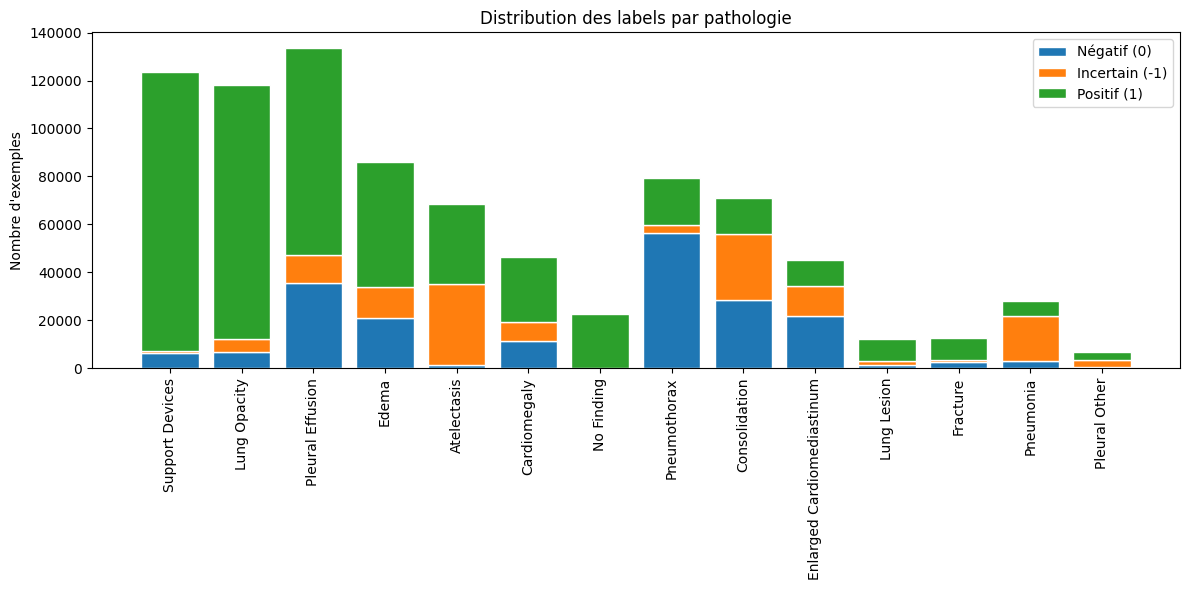

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("CheXpert-v1.0-small/full.csv", low_memory=False)

classes = [
    "No Finding", "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity",
    "Lung Lesion", "Edema", "Consolidation", "Pneumonia", "Atelectasis",
    "Pneumothorax", "Pleural Effusion", "Pleural Other", "Fracture",
    "Support Devices"
]

df[classes] = df[classes].apply(pd.to_numeric, errors="coerce")

pos_counts =   (df[classes] == 1).sum()
neg_counts =   (df[classes] == 0).sum()
unk_counts =   (df[classes] == -1).sum()

order = pos_counts.sort_values(ascending=False).index

pos = pos_counts[order].values
neg = neg_counts[order].values
unk = unk_counts[order].values

x = np.arange(len(order))

plt.figure(figsize=(12, 6))
plt.bar(x, neg, label="Négatif (0)",      edgecolor='white')
plt.bar(x, unk, bottom=neg, label="Incertain (-1)", edgecolor='white')
plt.bar(x, pos, bottom=neg+unk, label="Positif (1)",   edgecolor='white')

plt.xticks(x, order, rotation=90, ha="center")
plt.ylabel("Nombre d'exemples")
plt.title("Distribution des labels par pathologie")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()
